# CANDIDATE NUMBER: 555638

# INTRODUCTION

The project examines the dataset about car park usage of National Car Parks (NCP) in Birmingham during October-December in 2016, aiming to derive valuable insights into parking demand to predict its pattern based on several factors. This enables practical implications for introducing effective parking space and usage management, leading to improved urban mobility. The details of the dataset and further analysis are given as follows:

In [1]:
# Import necessary libraries

# For data wrangling
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure
from bokeh.io import show

# For statistical analysis
from scipy import stats

# For linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  
import statsmodels.api as sm

#magic function for displaying plot in the notebook
%matplotlib inline

Loading BokehJS ...

In [2]:
# Load the Birmingham Parking Dataset into a Dataframe
df = pd.read_excel("BhamParking(2).xlsx")

# 1. Generate descriptive statistics for the dataset, and comment on the main trends.

In [3]:
# Display the first few rows of the DataFrame 
df.head()

,SystemCodeNumber,Capacity,Occupancy,per_usage,per_occupancy,year,month,day,WorkingDay,hour,period
0,BHMBCCMKT01,577,61.0,10.57,0 - 25,2016,Oct,Tue,Yes,7,AM
1,BHMBCCMKT01,577,64.0,11.09,0 - 25,2016,Oct,Tue,Yes,8,AM
2,BHMBCCMKT01,577,80.0,13.86,0 - 25,2016,Oct,Tue,Yes,8,AM
3,BHMBCCMKT01,577,107.0,18.54,0 - 25,2016,Oct,Tue,Yes,9,AM
4,BHMBCCMKT01,577,150.0,26.00,25 - 50,2016,Oct,Tue,Yes,9,AM


In [4]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35332 entries, 0 to 35331
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SystemCodeNumber  35332 non-null  object 
 1   Capacity          35332 non-null  int64  
 2   Occupancy         35313 non-null  float64
 3   per_usage         35325 non-null  float64
 4   per_occupancy     35313 non-null  object 
 5   year              35332 non-null  int64  
 6   month             35332 non-null  object 
 7   day               35331 non-null  object 
 8   WorkingDay        35329 non-null  object 
 9   hour              35332 non-null  int64  
 10  period            35331 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 3.0+ MB


In [5]:
# Convert data types to format based on the context of analysis
# Change the data type of the "year" column from integer to string
df['year'] = df['year'].astype(str)

# Convert column "hour" to 24-hour format
df['hour'] = df['hour'].apply(lambda i: i + 12 if i <= 4 else i) #the latest afternoon hour recorded is 4pm

# Display the first few rows of the updated DataFrame 
df.head()

,SystemCodeNumber,Capacity,Occupancy,per_usage,per_occupancy,year,month,day,WorkingDay,hour,period
0,BHMBCCMKT01,577,61.0,10.57,0 - 25,2016,Oct,Tue,Yes,7,AM
1,BHMBCCMKT01,577,64.0,11.09,0 - 25,2016,Oct,Tue,Yes,8,AM
2,BHMBCCMKT01,577,80.0,13.86,0 - 25,2016,Oct,Tue,Yes,8,AM
3,BHMBCCMKT01,577,107.0,18.54,0 - 25,2016,Oct,Tue,Yes,9,AM
4,BHMBCCMKT01,577,150.0,26.00,25 - 50,2016,Oct,Tue,Yes,9,AM


In the context of my analysis:
- Occupancy and per_usage are continuous numerical variables.
 - Capacity and hour are discrete numerical variables.
 - day, month, per_occupancy, year, period, WorkingDay are categorical variables.

In [6]:
# Get the number of rows and columns of the Dataframe
df.shape

(35332, 11)

There are 35332 rows and 11 columns in the dataset.

In [7]:
# Access the basic statistics on continuous numerical variables
continuousnum_variables = ['Occupancy', 'per_usage']
df[continuousnum_variables].describe()

,Occupancy,per_usage
count,35313.000000,35325.000000
mean,642.681222,48.795447
std,659.719257,26.724268
min,0.000000,0.000000
25%,209.000000,25.380000
50%,448.000000,46.670000
75%,796.000000,71.100000
max,4327.000000,100.000000


The table shows that 'Occupancy' ranges from 0 to 4327 and has a wide variation with a mean of 642.68. 'per_usage' has a mean of 48.8%, indicating utilisation of nearly half of parking spaces on average. For discrete numerical variables, mean and standard deviation may not provide meaningful insights as for continuous variables.

In [8]:
# Access the basic statistics on discrete numerical variables
discretenum_variables = ['Capacity','hour']
df[discretenum_variables].agg(['count', 'min','max'])

,Capacity,hour
count,35332,35332
min,220,7
max,4675,16


Number of car parking spots available ranges from 220 to 4675, while 'hour' have certain values ranging from 7 (7:00AM) to 16 (4:00PM).

# 2. Check any records with missing values and handle the missing data as appropriate.

In [9]:
# Check columns list and the number of missing values
df.isnull().sum()

SystemCodeNumber     0
Capacity             0
Occupancy           19
per_usage            7
per_occupancy       19
year                 0
month                0
day                  1
WorkingDay           3
hour                 0
period               1
dtype: int64

There are 19 missing values in the column "Occupancy" and column "per_occupancy", and 7 missing values in the column "per_usage". This could be periods where occupancy data in some parking areas was not recorded. There is also 1 missing value in column "day" and column "period". This could be due to data entry error.

In [10]:
# Delete rows with missing values
df.dropna(inplace=True, axis="rows")

# Check missing values after deleting rows with missing values
df.isnull().sum()

SystemCodeNumber    0
Capacity            0
Occupancy           0
per_usage           0
per_occupancy       0
year                0
month               0
day                 0
WorkingDay          0
hour                0
period              0
dtype: int64

The missing data has been handled. Removing duplicates is also an important part of data cleaning.

In [11]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Change the data type of the "Occupancy" column from float to integer
df['Occupancy'] = df['Occupancy'].astype(int)

# Display the first few rows of updated Dataframe
df.head()

,SystemCodeNumber,Capacity,Occupancy,per_usage,per_occupancy,year,month,day,WorkingDay,hour,period
0,BHMBCCMKT01,577,61,10.57,0 - 25,2016,Oct,Tue,Yes,7,AM
1,BHMBCCMKT01,577,64,11.09,0 - 25,2016,Oct,Tue,Yes,8,AM
2,BHMBCCMKT01,577,80,13.86,0 - 25,2016,Oct,Tue,Yes,8,AM
3,BHMBCCMKT01,577,107,18.54,0 - 25,2016,Oct,Tue,Yes,9,AM
4,BHMBCCMKT01,577,150,26.00,25 - 50,2016,Oct,Tue,Yes,9,AM


# 3. Build graphs visualizing the following and comment on the obtained visual insights

In [45]:
# Set the default font for texts in plot
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'

# A. The distribution of one or more individual continuous variables

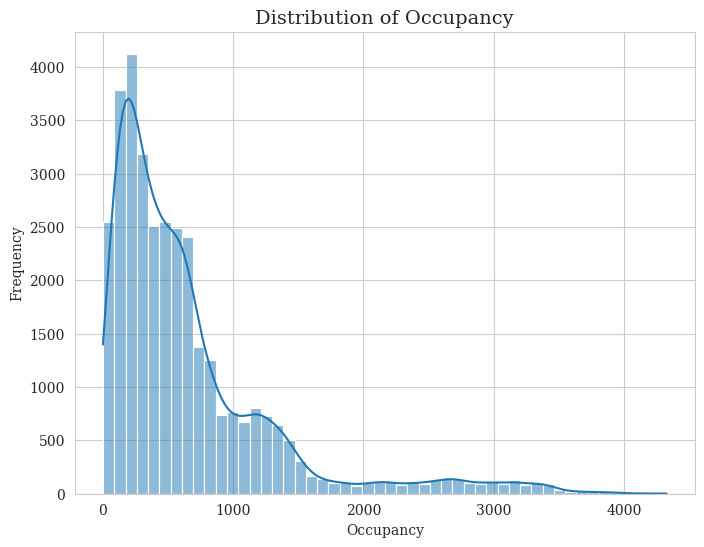

In [46]:
# Set the size of plot
plt.figure(figsize=(8, 6)) 

# Plot the distribution of 'Occupancy' using Seaborn
sns.histplot(df['Occupancy'], bins = 50, kde=True)

# Add title for the graph and adjust the size
plt.title('Distribution of Occupancy', fontsize=14)

# Add x/y labels for the graph and adjust the size
plt.xlabel("Occupancy", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Change the size of ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

Occupancy values are distributed from 0 to more than 4000. It looks to be right-skewed, which suggests that the level of the usage of the car park is low most of the time. Number of parking spots occupied at the time mostly ranges from 0 to less than 2000.

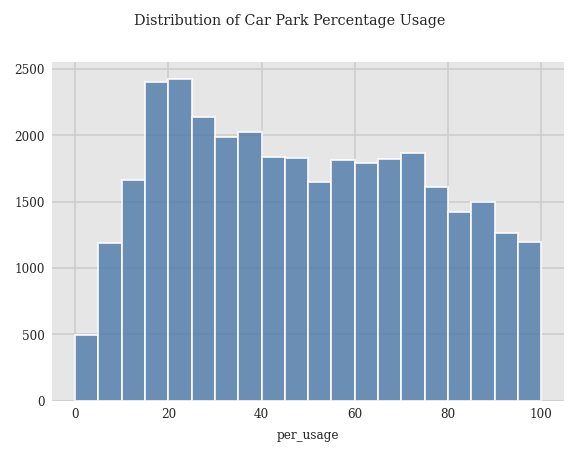

In [47]:
# Plot the distribution of 'per_usage' using dexplot
dxp.hist(val='per_usage', data=df, 
         xlabel= 'Percentage Usage of the car park', title = 'Distribution of Car Park Percentage Usage')

Histogram seems to have bimodal distribution. The mean is pulled towards the left. There are times the occupancy ratio is mainly around 20%, and there are other times that the percentage is mainly around 70%.

# B. The relationship of a pair of continuous variables

<Figure size 800x600 with 0 Axes>

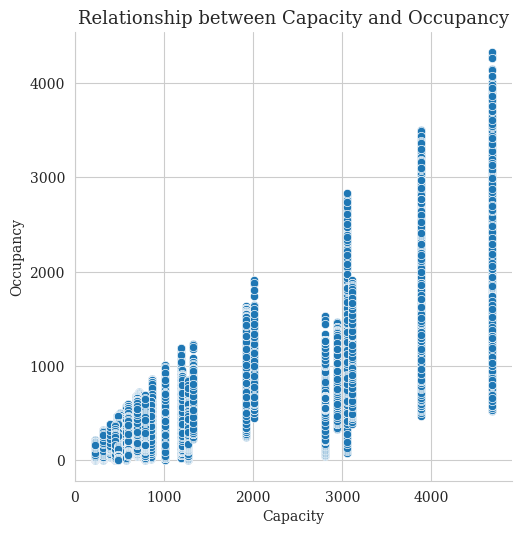

In [48]:
# Set the size of plot
plt.figure(figsize=(8, 6)) 

# Plot the relationship between "Capacity" and "Occupancy" using Seaborn
sns.relplot(x='Capacity', y='Occupancy', data=df)

# Add title and x/y labels
plt.title('Relationship between Capacity and Occupancy', fontsize=13)
plt.xlabel("Capacity", fontsize=10)
plt.ylabel("Occupancy", fontsize=10)

# Change the size of ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

There is a strong positive association between capacity and occupancy. As capacity increases, so does the usage of the car park.

# C. The association b/w a categorical variable and a continuous one.

G:\Annaconda\Lib\site-packages\dexplot\_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


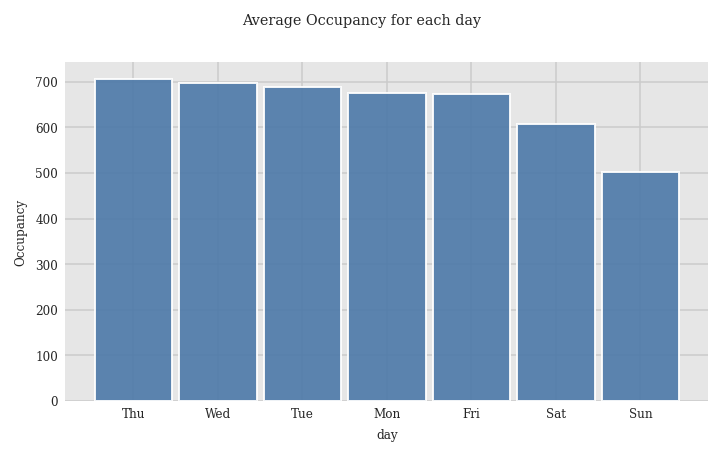

In [49]:
# Plot the mean value of 'Occupancy' for each day using dexplot
dxp.bar(x='day', y='Occupancy', data=df, 
        aggfunc='mean',sort_values='desc',figsize = (5,3), title = 'Average Occupancy for each day')

Thursday shows the highest average number of parking spots occupied (more than 700), followed by Wednesday and Tuesday. However, Sunday records the lowest value (only 500). Weekdays show higher parking demand, and this might be due to workdays.  

# D. The relationship between more than two variables, e.g., using semantic mappings.

<Figure size 1000x600 with 0 Axes>

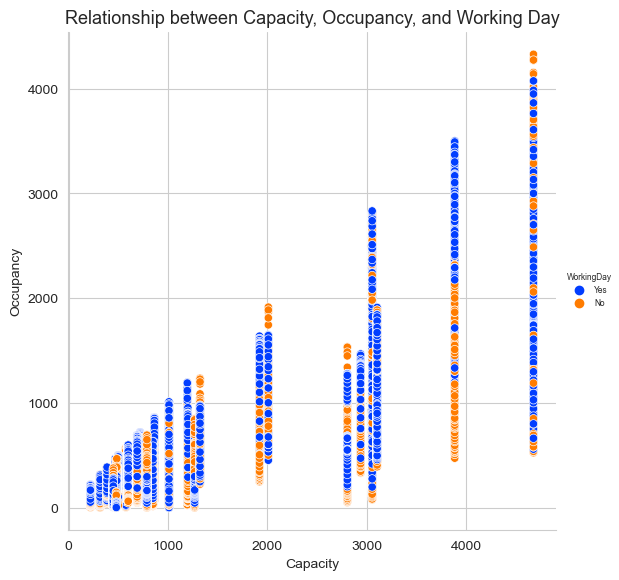

In [50]:
# Set the style of the plot
sns.set_style('whitegrid')

# Plot the relationship between Capacity, Occupancy, and Working Day using Seaborn
plt.figure(figsize=(10, 6))
plot = sns.relplot(x='Capacity', y='Occupancy', height=5.5, hue='WorkingDay'
            ,palette = "bright", data=df)

# Add title and labels for the plot
plt.title('Relationship between Capacity, Occupancy, and Working Day', fontsize=13)
plt.xlabel('Capacity', fontsize=10)
plt.ylabel('Occupancy', fontsize=10)

# Change the size of ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

- As mentioned above, Capacity and Occupancy show strong positive relationship. 
- It is clear that when capacity has specific values, there is a higher level of car park usage during weekdays compared to that during weekends. 
- A few observations show that when the capacity reaches about 1300, 2000, 2800 and about 4700, the occupancy number of weekends is higher than that of weekdays.

# 4. Display unique values of a categorical variable and their frequencies.

In [51]:
# Get unique values in column "per_occupancy"
df["per_occupancy"].unique()

array(['0 - 25', '25 - 50', '50 - 75', '75-100'], dtype=object)

There are 4 unique values in "per_occupancy" variable: '0 - 25', '25 - 50', '50 - 75', '75-100'.

In [52]:
# Get the frequency of each value in column "per_occupancy"
df["per_occupancy"].value_counts()

25 - 50    9815
50 - 75    8945
0 - 25     8178
75-100     6994
Name: per_occupancy, dtype: int64

'25%-50%' occupancy percentage range has the highest number of observations (9815), compared to only  6994 for '75%-100%' range. The second highest is '50% - 75%' (8945), followed by '0% - 25%' (8178).  

In [53]:
# Get unique values in column "period"
df["period"].unique()

array(['AM', 'PM'], dtype=object)

There are 2 unique values in variable "period": 'AM' and 'PM'.

In [54]:
# Get the frequency of each value in column "period"
df["period"].value_counts()

PM    18014
AM    15918
Name: period, dtype: int64

'PM' period (18014) shows higher frequency, compared to 15918 for 'AM' period.

# 5. Build a contingency table of two potentially related categorical variables. Conduct a statistical test of the independence between them and interpret the results.

In [55]:
# Order the value of 'month' column
month_order = ['Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [56]:
# Create a contingency table of "month" and "per_occupancy"
cont_table = pd.crosstab(df['month'],df['per_occupancy'] )

# Print the contingency table
cont_table

per_occupancy,0 - 25,25 - 50,50 - 75,75-100
month,,,,
Oct,3036,3555,3278,2014
Nov,3584,4114,3488,3021
Dec,1558,2146,2179,1959


- It is clear that percentage occupancy group '75-100' has the lowest number of observations in each month. This implies that the car park is rarely filled to its full capcity. 
- However, '25-50' category tends to have the highest count in all three months. This suggests that car park frequently maintains this occupancy percentage range. 
- Overall, there is higher count in November compared to the other months in all categories of percentage occupancy, which may indicate higher parking demand in November, but it depends on the accuracy of car park sensors.

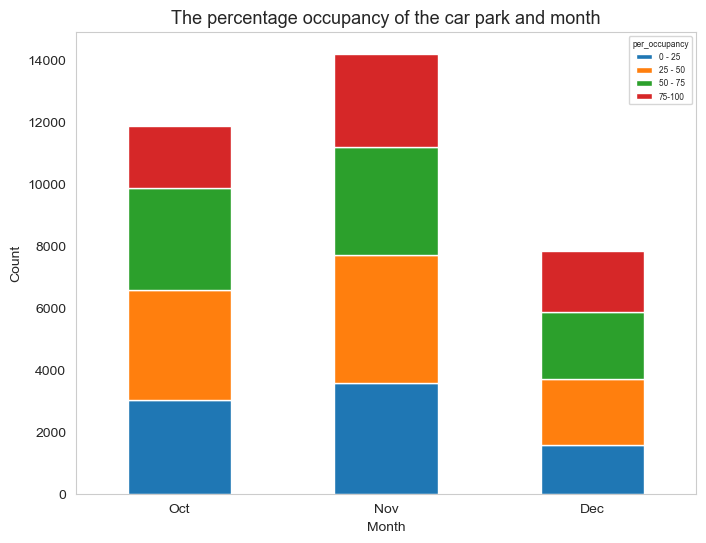

In [57]:
# Creat bar plot for contigency table of "month" and "per_occupancy"
cont_table.plot(kind="bar", stacked=True, rot=0, figsize=(8, 6))

# Add title and labels
plt.title('The percentage occupancy of the car park and month', fontsize=13)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Change the size of ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

- The charts illustrates how percentage occupancy categories varies across 3 months.
- It is shown that December has a quite balanced distribution of 4 categories of 'per_occupancy'. 
- Higher proportion of all categories is shown in November. October shows higher occupancy occurrences than December.

In [58]:
# Perform chi-square test between "month" and "per_occupancy"
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)

# Print p-value result
print(f"p-value: {p_val}")

p-value: 2.0172506189192855e-55


$p<0.05$, hence we have to reject null hypothesis of no dependence between the percentage occupancy of the car park in categories and month.
We found evidence that November inidcates greater occupancy occurrences. This can be explained by seasonal trends.

# 6. Retrieve one or more subset of rows based on two or more criteria and present descriptive statistics on the subset(s). 

In [59]:
# Select 'Capacity' greater than 500, 'Occupancy' less than 3,000, and 'period' of AM
df_retrieve = df[(df['Capacity'] > 500) & (df['Occupancy'] < 3000) & (df['period'] == 'AM')]

# Print the first few rows of new dataframe "df_retrieve"
df_retrieve.head()

,SystemCodeNumber,Capacity,Occupancy,per_usage,per_occupancy,year,month,day,WorkingDay,hour,period
0,BHMBCCMKT01,577,61,10.57,0 - 25,2016,Oct,Tue,Yes,7,AM
1,BHMBCCMKT01,577,64,11.09,0 - 25,2016,Oct,Tue,Yes,8,AM
2,BHMBCCMKT01,577,80,13.86,0 - 25,2016,Oct,Tue,Yes,8,AM
3,BHMBCCMKT01,577,107,18.54,0 - 25,2016,Oct,Tue,Yes,9,AM
4,BHMBCCMKT01,577,150,26.00,25 - 50,2016,Oct,Tue,Yes,9,AM


In [60]:
# Present descriptive statistics on continuous numerical variables on the subset
df_retrieve[continuousnum_variables].describe()

,Occupancy,per_usage
count,11889.000000,11889.000000
mean,597.263184,37.518870
std,518.771479,24.023116
min,0.000000,0.000000
25%,220.000000,18.250000
50%,486.000000,32.100000
75%,772.000000,54.080000
max,2999.000000,100.000000


For a subset of data, 'Occupancy' ranges from 0 to 2999 and has a wide variation with a mean of 597.26.'per_usage' has a mean of 37.5%.

In [61]:
# Present descriptive statistics on discrete numerical variables on the subset
df_retrieve[discretenum_variables].agg(['count', 'min','max'])

,Capacity,hour
count,11889,11889
min,577,7
max,4675,11


'Capacity' ranges from 577 to 4675 and only morning hours are shown.

# 7. Conduct a statistical test of the significance of the difference between the means of two subsets of the data and interpret the results.

In [62]:
# Conduct the independent two-sample t-test that determines whether there is a significant difference 
# between means of the 'Occupancy' between two subsets "Yes" and "No" based on the 'WorkingDay' variable.
# Select the Occupancy of "working day" (Yes)
working_day = df[df['WorkingDay'] =='Yes']['Occupancy']

# Mean Occupancy of working day
working_day.mean()         

688.8280422226649

In [63]:
# Select the Occupancy of "weekend" (No)
weekend = df[df['WorkingDay'] =='No']['Occupancy']

# Mean Occupancy of weekend
weekend.mean()         

555.3450776028095

Establish hypothesis testing:

$H_0$: no difference between the means 'Occupancy' of subset "working day" and subset "weekend" based on the 'WorkingDay' variable

$H_A$: Significant difference between them


In [64]:
# Calculate the test statistic and p-value
t_val, p_val = stats.ttest_ind(working_day, weekend)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 16.25431818255598, p-value: 3.4858956288530545e-59


p_value < $\alpha=0.05$

Therefore **we reject the null hypothesis that the mean occupancy of working day is not different from the mean occupancy of weekend**.

## 8. Create one or more tables that group the data by a certain categorical variable and display summarized information for each group (e.g., the mean or sum within the group).

In [65]:
# Display summarized information of 'Occupancy' and 'per_usage' by month
df.groupby('month')[['Occupancy','per_usage']].agg(['mean', 'median', 'std'])

Occupancy                     per_usage                   
             mean median         std       mean  median        std
month                                                             
Oct    611.669865  434.0  606.901157  46.928408  45.010  25.410810
Nov    650.769480  457.0  671.600018  48.487145  46.000  27.023195
Dec    724.445805  500.0  733.252258  52.742965  53.275  26.594890

December shows higher mean and median values of 'Occupancy' and 'per_usage', compared to October and November. This can be due to certain activities that lead to greater parking demand in December. However, Novermber has highest standard deviation of 'per_usage'.

# 9. Implement a linear regression model and interpret its output including its accuracy

Categorical variables need to be transferred into dummy variables before incorporating them into regression analysis.
- For 'WorkingDay', we have 1 dummy variable 'WorkingDay_Yes' = 1 if working day, = 0 if weekend.
- For 'month', we have 2 dummy variables: 'month_Oct' and 'month_Nov'. 'Dec' is the reference category. 'month_Oct' = 1 if month is October, = 0 if otherwise. Similarly, 'month_Nov' = 1 if month is November, = 0 if otherwise.  
- For 'period', we have 1 dummy variable 'period_AM' = 1 if period is 'AM', = 0 if 'PM'.

In [66]:
# Transform variable "WorkingDay" into dummy variable
WorkingDay_dummies = pd.get_dummies(df['WorkingDay'], prefix='WorkingDay')

# Transform variable "month" into dummy variable
month_dummies = pd.get_dummies(df['month'], prefix='month')

# Transform variable "period" into dummy variable 
period_dummies = pd.get_dummies(df['period'], prefix='period')

# Concatenate "df" with 3 new dataframes
data_with_dummies = pd.concat([df, WorkingDay_dummies, month_dummies, period_dummies], axis=1)

# Select the columns of dummy variables
columns_dummies = [col for col in data_with_dummies.columns 
                   if 'WorkingDay' in col or 'month' in col or 'period' in col]

# Print the columns of dummy variables of dataframe "data_with_dummies"
data_with_dummies[columns_dummies].head()

,month,WorkingDay,period,WorkingDay_No,WorkingDay_Yes,month_Oct,month_Nov,month_Dec,period_AM,period_PM
0,Oct,Yes,AM,0,1,1,0,0,1,0
1,Oct,Yes,AM,0,1,1,0,0,1,0
2,Oct,Yes,AM,0,1,1,0,0,1,0
3,Oct,Yes,AM,0,1,1,0,0,1,0
4,Oct,Yes,AM,0,1,1,0,0,1,0


# Implement a multiple linear regression model to predict the Occupancy of the car park from Capacity, hour, WorkingDay_Yes, month_Nov, month_Oct, period_AM

In [67]:
# Select columns to conduct correlation analysis
columns_corr = [ 'Occupancy', 'Capacity','hour', 'WorkingDay_Yes', 'month_Nov', 'month_Oct', 'period_AM']
# Conduct correlation matrix
data_with_dummies[columns_corr].corr()

,Occupancy,Capacity,hour,WorkingDay_Yes,month_Nov,month_Oct,period_AM
Occupancy,1.000000,0.777828,0.196422,0.087901,-0.004248,-0.046760,-0.189887
Capacity,0.777828,1.000000,0.003751,-0.016529,0.002686,-0.008071,-0.005704
hour,0.196422,0.003751,1.000000,0.007601,0.029279,-0.016034,-0.867813
WorkingDay_Yes,0.087901,-0.016529,0.007601,1.000000,0.006097,-0.053481,-0.001094
month_Nov,-0.004248,0.002686,0.029279,0.006097,1.000000,-0.623033,-0.012415
month_Oct,-0.046760,-0.008071,-0.016034,-0.053481,-0.623033,1.000000,0.001549
period_AM,-0.189887,-0.005704,-0.867813,-0.001094,-0.012415,0.001549,1.000000


- There is multicollinearity when independent variables are highly correlated with each other (r >= 0.7 or r =< -0.7): 'period_AM' and 'hour' (-0.87: Strong negative relationship). 
- I decide to omit variable: 'period_AM'.

# Implement multiple linear regression model using scikit-learn

In [68]:
# Set X (independent variables) and y (dependent variable)
X = data_with_dummies[['Capacity', 'hour', 'WorkingDay_Yes', 'month_Nov', 'month_Oct']]
y = data_with_dummies['Occupancy']

# Split the data into training/testing sets
parking_X_train, parking_X_test, parking_y_train, parking_y_test = train_test_split(X, y,test_size=0.2, 
                                                                                random_state=42)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(parking_X_train, parking_y_train)

# Make predictions using the testing set
y_pred = regr.predict(parking_X_test)

# The coefficients of variables and intercept
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': regr.coef_})
intercept = regr.intercept_

# Print the coefficients of variables and intercept
print("Intercept:", intercept)
print(coefficients)

Intercept: -596.3730074356193
         Variable  Coefficient
0        Capacity     0.438820
1            hour    49.280317
2  WorkingDay_Yes   144.276719
3       month_Nov   -71.812362
4       month_Oct   -91.014331


# The estimated model: Occupancy = - 596.373 + 0.43882 * Capacity + 49.2803 * hour + 144.2767 * WorkingDay_Yes  - 71.8124 * month_Nov - 91.0143 * month_Oct + e

In [69]:
# Evaluate the model and goodness of fit

# Calculate mean squared error
mse = mean_squared_error(parking_y_test, y_pred)

# Calculate R-squared
r2 = r2_score(parking_y_test, y_pred)

# Get the number of observations
n = len(parking_y_test)

# Number of independent variables
p = X.shape[1]  

# Adjusted R-squared
adjusted_r2 = 1 - (1-r2) * (n-1)/(n-p-1)

# Print the result
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}') 
print(f'Adjusted R-squared: {adjusted_r2}')

Mean Squared Error: 145766.5384148901
R-squared: 0.6525736009317211
Adjusted R-squared: 0.6523174245572423


### Quality of the Model: adjusted R^2 values are around 0.6523
The model is reasonably quite good, about 65.23% of the occupancy of the car park variability depends on the capacity of the car park, hour, WorkingDay and month. The remaining 34.77% are other factors not included in the model that affect the occupancy.

In fact, scikit-learn is more suitable for predictive modelling and does not provide statistical significance of variables. For statistical significance tests of variables, we should use package statsmodels instead.

# Implement multiple linear regression model using statsmodels

In [70]:
# Implement multiple linear regression model using statsmodels
model = sm.OLS.from_formula(
    'Occupancy ~ Capacity + hour + WorkingDay_Yes + month_Nov + month_Oct', data=data_with_dummies).fit()

#Interpret the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Occupancy   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                 1.289e+04
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:59:17   Log-Likelihood:            -2.5070e+05
No. Observations:               33932   AIC:                         5.014e+05
Df Residuals:                   33926   BIC:                         5.015e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -593.5404     11.431    -51.923      0.000    -615.946    -571.135
Capacity           0.4354      0.002    244.052      0.000       0.432       0.439
hour              49.1785      0.812     60.591      0.000      47.588      50.769
WorkingDay_Yes   145.9618      4.853     30.079      0.000     136.450     155.473
month_Nov        -72.1062      5.510    -13.087      0.000     -82.905     -61.307
month_Oct        -91.4838      5.705    -16.037      0.000    -102.665     -80.302
==============================================================================
Omnibus:                     4757.881   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17920.526
Skew:                           0.676   Prob(JB):                         0.00
Kurtosis:                       6.294   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Significance of the variables: 
- With 0.05 significance level, the intercept is significant (p=0.000)
- The coefficients of all independent variables are statistically significant ( p=0.000 < 0.05). 
- Capacity, hour, and WorkingDay_Yes exert a positive effect on the occupancy (for example, working day has higher level of car park usage than weekend).
- month_Nov and month_Oct have a negative impact on the dependent variable (for example, occupancy in October is estimated to be 91.48 less than that in December).
- WorkingDay the highest coefficent (145.96), which indicates the highest impact.

### Checking the assumptions of classical linear regression model

In [71]:
# set the size of the figure
fig = figure(height=400, width=400)

# the x axis is the fitted values
# the y axis is the standardized residuals
st_resids = model.get_influence().resid_studentized_internal
fig.circle(model.fittedvalues, st_resids)

# show the figure
show(fig)

Residuals appear to be randomly distributed around 0. This passes the assumption 'the independence of errors' and the assumption 'homoskedasticity of errors'.

In [72]:
# Create histogram of the standardized residuals
# Create a histogram with 10 bins
hist, edges = np.histogram(st_resids, bins=10)
fig = figure(height=400, width=400)
fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(fig)

The error distribution is not normal because it is skewed to the right. Looking at the summary table the model, the p-value of the Jarque-Bera statistic is 0.00, hence we would reject the null hypothesis that the error distribution is normal at the 0.05 significance level. There might be outliers that may affect the normalities of residuals.

# CONCLUSION

In conclusion, this project provides important insights into variables affecting parking lot occupancy. Opening more parking facilities on weekdays to fulfil the increased parking demand should be taken into consideration, especially during peak hours. Furthermore, lower occupancy in certain months can allow for more strategic car park management to cope with seasonal variation.

# WORD COUNT

In [73]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [74]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1550
